### Select the Right Threshold values using ROC Curve

* **ROC** used for ``Binary`` Classification But **not** used for ``Multiclass`` Classification.

* correct Thresold values depend on the ``ROC Curve`` and ``accuracy`` of our model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification




In [2]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [3]:
X.shape

(2000, 20)

In [4]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#### Random Forests

In [7]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9812500000000001


In [8]:
ytrain_pred
#probablity of 0 and 1.....

array([[1.  , 0.  ],
       [0.97, 0.03],
       [0.  , 1.  ],
       ...,
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.22, 0.78]])

**roc_auc_score** : Compute the ``area`` under the ``ROC`` curve

#### Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


#### Adaboost Classifier

In [10]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


#### KNNClassifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


## Now we will focus on selecting the best threshold for maximum accuracy

In [12]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
    
final_prediction = pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9847444444444444


In [13]:
pred

[0      1.00
 1      0.00
 2      0.98
 3      0.91
 4      0.50
        ... 
 595    0.00
 596    0.00
 597    1.00
 598    0.02
 599    0.99
 Length: 600, dtype: float64,
 0      0.991861
 1      0.000008
 2      0.966929
 3      0.761539
 4      0.779443
          ...   
 595    0.024239
 596    0.000003
 597    0.984385
 598    0.001147
 599    0.989540
 Length: 600, dtype: float64,
 0      0.559186
 1      0.463282
 2      0.538202
 3      0.509875
 4      0.490344
          ...   
 595    0.461121
 596    0.441377
 597    0.532403
 598    0.441720
 599    0.559890
 Length: 600, dtype: float64,
 0      1.0
 1      0.0
 2      0.8
 3      0.8
 4      0.4
       ... 
 595    0.0
 596    0.0
 597    1.0
 598    0.2
 599    0.8
 Length: 600, dtype: float64]

In [18]:
pd.concat(pred,axis=1)

,0,1,2,3
0,1.00,0.991861,0.559186,1.0
1,0.00,0.000008,0.463282,0.0
2,0.98,0.966929,0.538202,0.8
3,0.91,0.761539,0.509875,0.8
4,0.50,0.779443,0.490344,0.4
...,...,...,...,...
595,0.00,0.024239,0.461121,0.0
596,0.00,0.000003,0.441377,0.0
597,1.00,0.984385,0.532403,1.0
598,0.02,0.001147,0.441720,0.2


In [41]:
final_prediction
#it is the mean of all four columns for an each row.

0      0.880262
1      0.115823
2      0.826283
3      0.740353
4      0.572447
         ...   
595    0.121340
596    0.115345
597    0.876697
598    0.160717
599    0.834857
Length: 600, dtype: float64

#### Calculate the ROc Curve

``ROC`` curve returns the ``False positve rate`` , ``true positive rate`` and ``thresolds``.

In [16]:
import numpy as np

In [29]:
weight = np.linspace(0, 1,num=600 )

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction,sample_weight= weight)
thresholds

array([1.91123256, 0.91123256, 0.9109413 , 0.91077475, 0.90938114,
       0.90822553, 0.90732118, 0.90728779, 0.90672166, 0.90280396,
       0.90268409, 0.90217349, 0.90174686, 0.90156694, 0.9010034 ,
       0.90072159, 0.90043872, 0.89258074, 0.89179164, 0.89019042,
       0.89002641, 0.88908893, 0.88900935, 0.8884741 , 0.88776179,
       0.88690228, 0.88671141, 0.88646892, 0.88567906, 0.8852299 ,
       0.88504606, 0.88483936, 0.88437516, 0.88415382, 0.88411482,
       0.88350509, 0.88324954, 0.88295851, 0.8828124 , 0.88215573,
       0.88141991, 0.88129902, 0.88127253, 0.88099308, 0.88048896,
       0.88038605, 0.87949391, 0.87946679, 0.87919722, 0.87919192,
       0.87805657, 0.87742245, 0.87714425, 0.87712611, 0.87681405,
       0.87642893, 0.87624753, 0.87582732, 0.87539756, 0.87519096,
       0.8751398 , 0.87463516, 0.87451832, 0.87418561, 0.87349217,
       0.87230885, 0.87203764, 0.87161489, 0.87120809, 0.87119267,
       0.87096066, 0.86976367, 0.86875699, 0.86711894, 0.86703

In [23]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
311,0.430370,0.963333
312,0.429728,0.961667
310,0.442103,0.961667
309,0.462402,0.960000
303,0.539696,0.960000


In [29]:
thresholds[311] #gives the highest accuracy for this threshold

0.44700601746765034

In [24]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

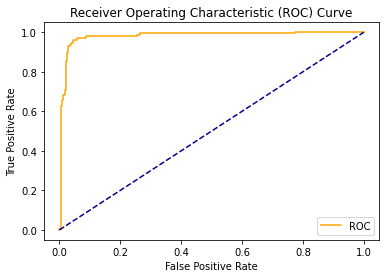

In [25]:
plot_roc_curve(fpr,tpr)

In [32]:
len(thresholds)

601

In [33]:
accuracy_ls.shape

(601, 2)